In [6]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [3]:
def load_elevation_dataset(path="../raw/metdata_elevationdata.nc"):
    """
    Loads elevation data from a NetCDF file
    """
    elevation_data = nc.Dataset(path)
    lat = elevation_data.variables['lat'][:]
    lon = elevation_data.variables['lon'][:]
    elevation = elevation_data.variables['elevation'][:]
    elevation_data.close()

    return lat, lon, elevation

def get_elevation(elevation, target_lat, target_lon, lat, lon):
    """
    Retrieves the elevation at the nearest specified latitude and longitude
    """
    return elevation[(np.abs(lat - target_lat)).argmin(), (np.abs(lon - target_lon)).argmin()]

def generate_random_coords(lat, lon, num_coords):
    """
    Generates a list of tuples containing random coordinates within specified latitude and longitude ranges.
    """
    coords = []
    for _ in range(num_coords):
        glat = random.uniform(lat.min(), lat.max())
        glon = random.uniform(lon.min(), lon.max())
        coords.append((float(glat), float(glon)))
    
    return coords

#### Visualize Elevation Data

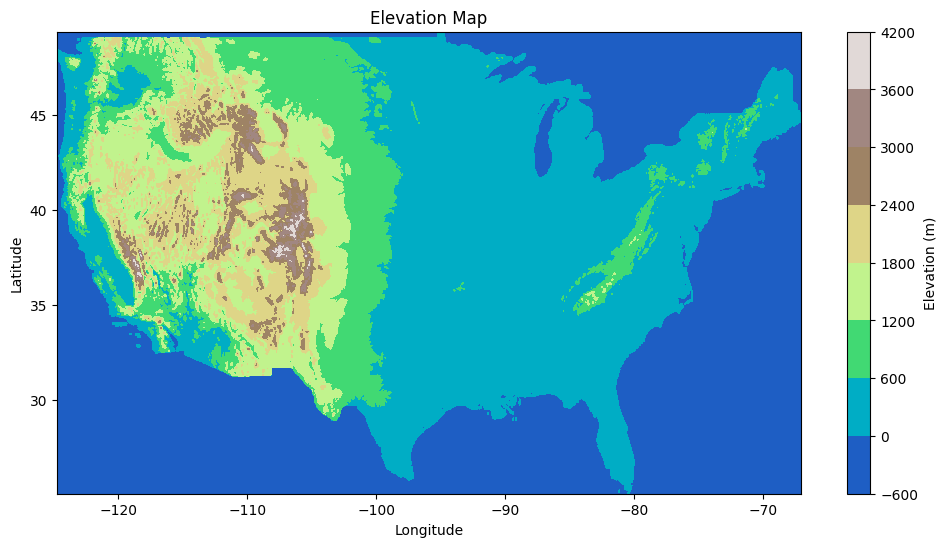

In [4]:
lat, lon, elevation = load_elevation_dataset()
lon_grid, lat_grid = np.meshgrid(lon, lat)

plt.figure(figsize=(12, 6))
plt.contourf(lon_grid, lat_grid, elevation, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title('Elevation Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### Check elevation at random valid coordinates

In [5]:
random_coords = generate_random_coords(lat, lon, 10)

for la, lo in random_coords:
    e = get_elevation(elevation, la, lo, lat, lon)
    print(f"Elevation at ({la}, {lo}): {e} meters")

Elevation at (33.87250047368607, -86.98788220097276): 121.52 meters
Elevation at (41.57668139037393, -113.54241804662628): 1455.72 meters
Elevation at (35.22963747842299, -124.34762590952462): 0.0 meters
Elevation at (44.36339568518243, -92.48230179164594): 331.76 meters
Elevation at (42.843385941621506, -99.73395816122465): 715.92 meters
Elevation at (40.77827268450383, -123.35282872671759): 633.17 meters
Elevation at (47.56476453909717, -115.60758560181932): 1274.08 meters
Elevation at (48.67496556867078, -87.354244302052): 0.0 meters
Elevation at (26.1930661361037, -109.3479375802109): 0.0 meters
Elevation at (39.19132998138548, -85.84046192621332): 196.64000000000001 meters
